2602199582 - Fiona Maharani Nugraha

# Importing Libraries

In [98]:
#Manipulasi data
import numpy as np
import pandas as pd

#Visualisasi data
import matplotlib.pyplot as plt
import seaborn as sns


#Vachine learning library essentials
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier




# Load Data

In [99]:
df = pd.read_csv(r"C:\Users\Fiona\Documents\coolyeah\Semester 4\Model Deployment\UTS_kumpul\data_D.csv")

In [100]:
df.head()

,Unnamed: 0,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
0,0,106473,15639576,Sarratt,652.0,France,Female,65.0,3,0.00,2,1,1,136592.24,0
1,1,62345,15769582,Hanson,464.0,France,Male,35.0,4,0.00,1,0,0,99505.75,1
2,2,126615,15675888,Austin,620.0,Germany,Female,39.0,6,129401.87,2,1,1,102681.32,1
3,3,35909,15786617,Tuan,598.0,France,Female,30.0,7,0.00,2,1,0,141210.18,0
4,4,45175,15757310,Li Fonti,682.0,Germany,Female,46.0,4,107720.57,1,0,0,93832.33,1


In [101]:
df.shape

(41259, 15)

In [102]:
df.columns

Index(['Unnamed: 0', 'id', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churn'],
      dtype='object')

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  object 
 6   Gender           41259 non-null  object 
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 4.7+ MB


# Data Preprocessing

In [104]:
df['Geography'].value_counts()

France     23520
Spain       9081
Germany     8658
Name: Geography, dtype: int64

Mengubah data kategorikal menjadi numerik

Geography menjadi 0, 1, 2 dan Gender menjadi 0 dan 1

In [105]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Mengkodekan fitur 'Geography'
df['Geography'] = label_encoder.fit_transform(df['Geography'])

# Mengkodekan fitur 'Gender'
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41259 entries, 0 to 41258
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       41259 non-null  int64  
 1   id               41259 non-null  int64  
 2   CustomerId       41259 non-null  int64  
 3   Surname          41259 non-null  object 
 4   CreditScore      41251 non-null  float64
 5   Geography        41259 non-null  int32  
 6   Gender           41259 non-null  int32  
 7   Age              41259 non-null  float64
 8   Tenure           41259 non-null  int64  
 9   Balance          41259 non-null  float64
 10  NumOfProducts    41259 non-null  int64  
 11  HasCrCard        41259 non-null  int64  
 12  IsActiveMember   41259 non-null  int64  
 13  EstimatedSalary  41259 non-null  float64
 14  churn            41259 non-null  int64  
dtypes: float64(4), int32(2), int64(8), object(1)
memory usage: 4.4+ MB


Cek data kosong

In [106]:
df.isna().sum()

Unnamed: 0         0
id                 0
CustomerId         0
Surname            0
CreditScore        8
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
churn              0
dtype: int64

Mengisi data kosong dengan rata-rata nilai CreditScore

In [107]:
df['CreditScore'].fillna(df['CreditScore'].mean(), inplace=True)
df['CreditScore'].isna().sum()

0

Cek data duplikat

In [108]:
df.duplicated().sum()

0

In [109]:
# Menghapus kolom 'Surname' dan 'Unnamed: 0'
df.drop(['Surname', 'Unnamed: 0'], axis=1, inplace=True)


Cek Outlier

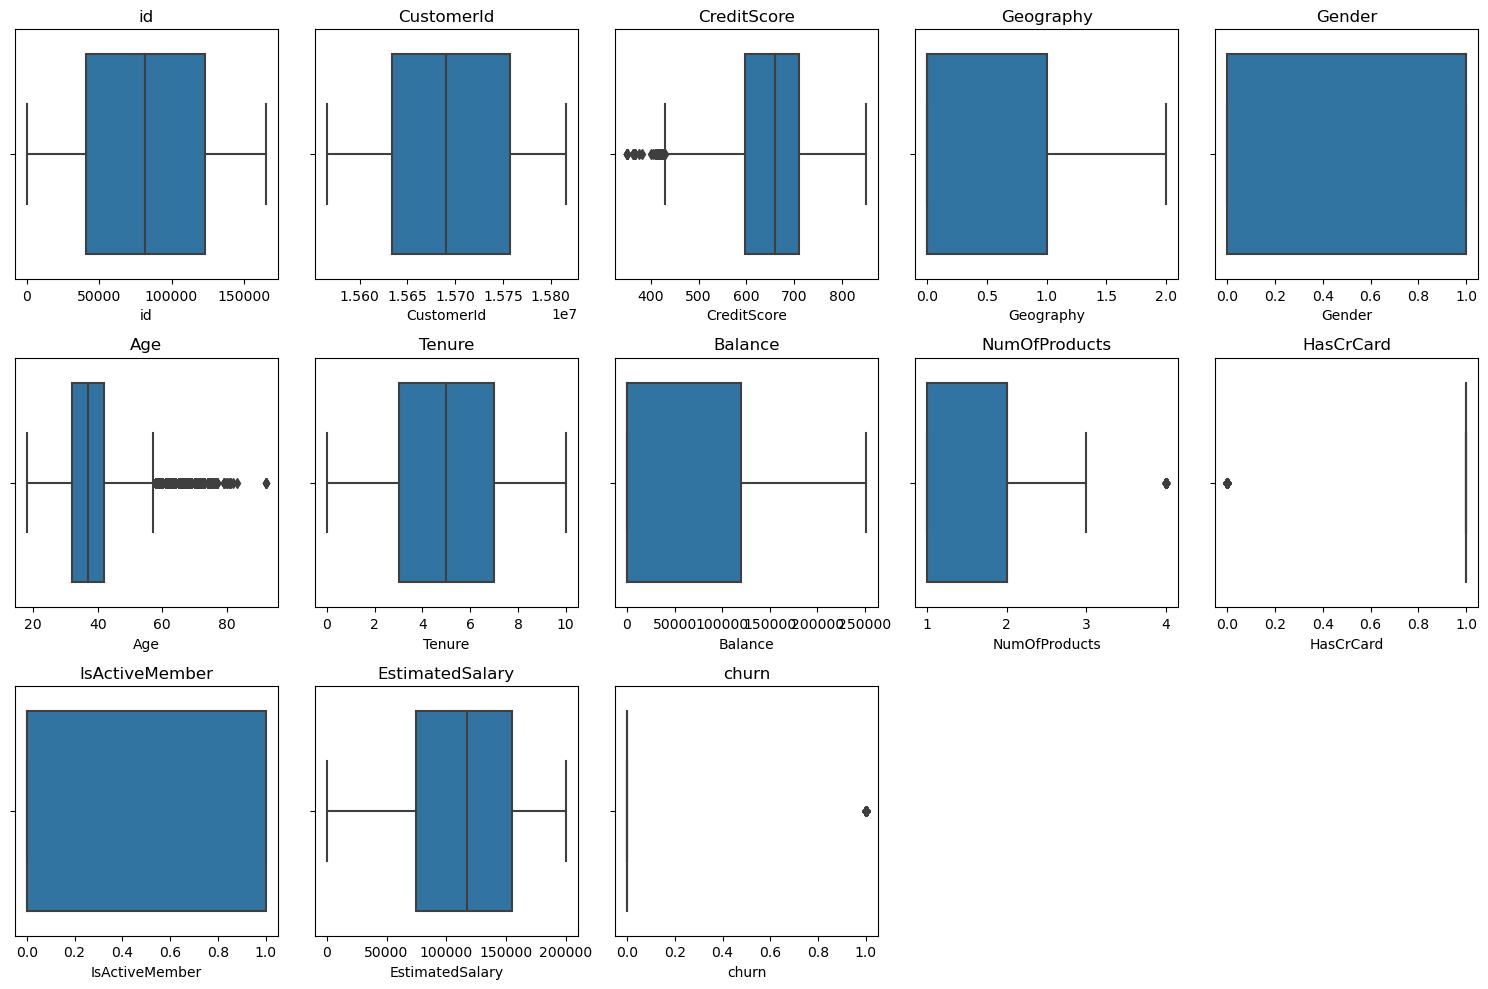

In [110]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

Menangani outlier dengan metode IQR:
- Menghitung nilai IQR untuk setiap fitur.
- Menentukan batas atas dan batas bawah untuk outlier.
- Mengganti nilai outlier dengan nilai batas atas atau batas bawah.

In [111]:
#Mengidentifikasi outlier
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df.loc[df[column] < lower_bound, column] = lower_bound
    df.loc[df[column] > upper_bound, column] = upper_bound

# Mengidentifikasi dan menangani outlier untuk setiap fitur
outlier_columns = ['CreditScore', 'Age', 'NumOfProducts']
for column in outlier_columns:
    handle_outliers(df, column)

# Menampilkan DataFrame setelah menangani outlier
print(df.head())

       id  CustomerId  CreditScore  Geography  Gender   Age  Tenure  \
0  106473    15639576        652.0          0       0  57.0       3   
1   62345    15769582        464.0          0       1  35.0       4   
2  126615    15675888        620.0          1       0  39.0       6   
3   35909    15786617        598.0          0       0  30.0       7   
4   45175    15757310        682.0          1       0  46.0       4   

     Balance  NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  churn  
0       0.00            2.0          1               1        136592.24      0  
1       0.00            1.0          0               0         99505.75      1  
2  129401.87            2.0          1               1        102681.32      1  
3       0.00            2.0          1               0        141210.18      0  
4  107720.57            1.0          0               0         93832.33      1  


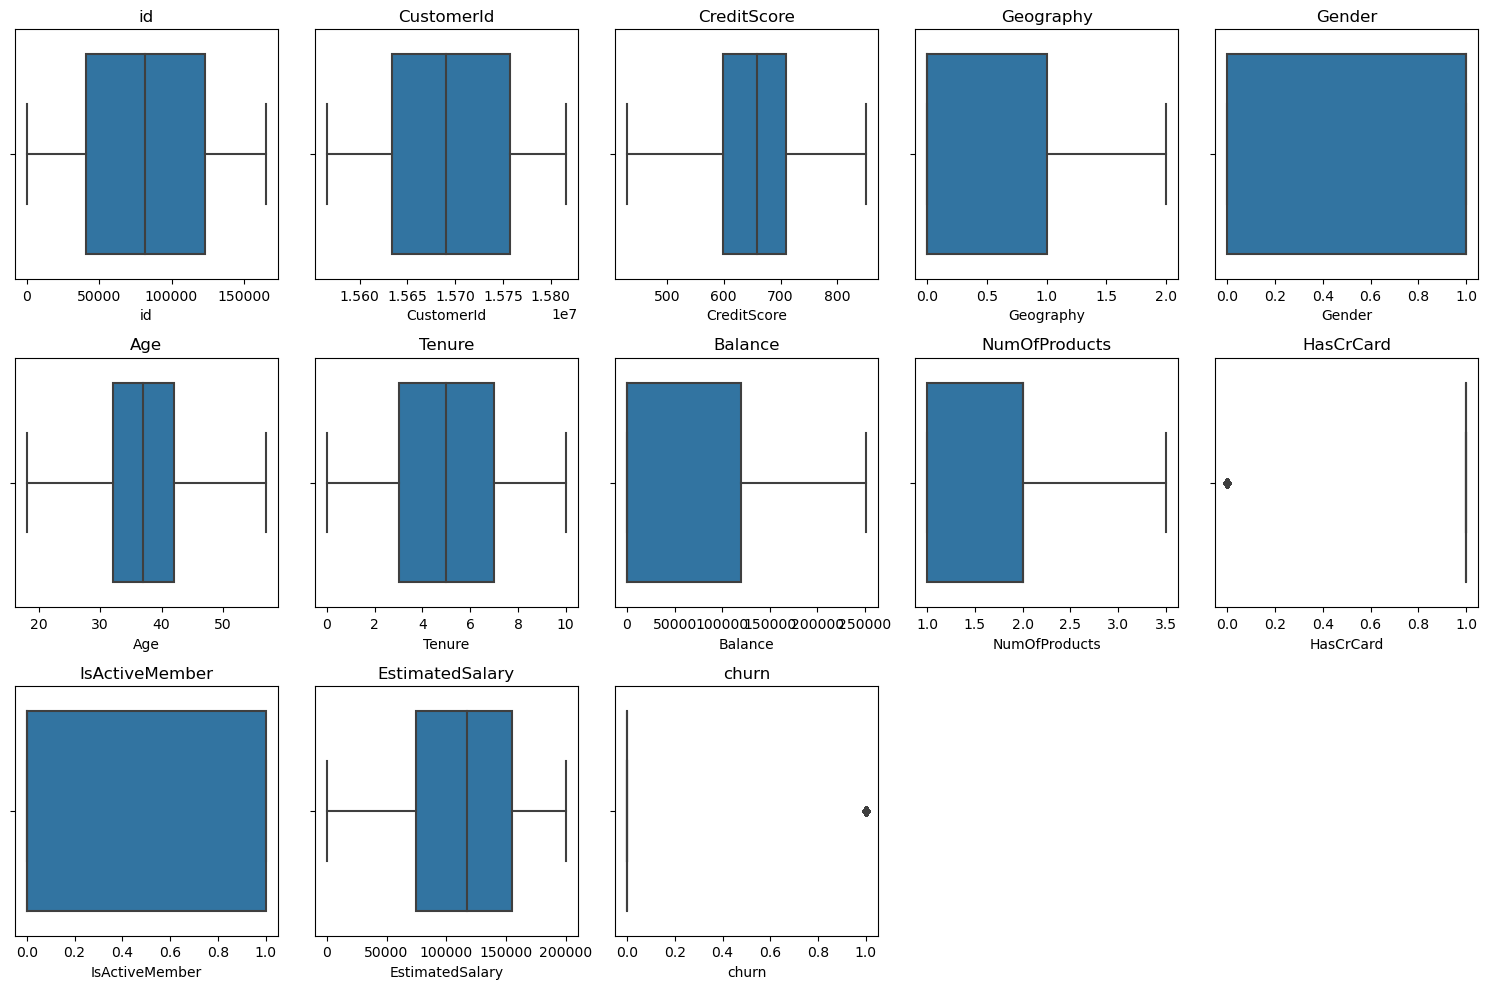

In [112]:
plt.figure(figsize=(15, 10))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 5, i)
    sns.boxplot(x=df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

# EDA

In [113]:
df.describe()

,id,CustomerId,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churn
count,41259.000000,4.125900e+04,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000,41259.000000
mean,82171.693231,1.569221e+07,656.324105,0.650040,0.561477,37.822124,4.999127,55712.496615,1.552910,0.754405,0.496667,112308.502138,0.211324
std,47498.739183,7.137974e+04,79.910913,0.817129,0.496212,8.121287,2.802930,62858.019091,0.539891,0.430445,0.499995,50367.874510,0.408252
min,3.000000,1.556570e+07,430.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,41098.500000,1.563347e+07,598.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,1.000000,0.000000,74580.800000,0.000000
50%,81851.000000,1.569013e+07,659.000000,0.000000,1.000000,37.000000,5.000000,0.000000,2.000000,1.000000,0.000000,117036.380000,0.000000
75%,123064.500000,1.575714e+07,710.000000,1.000000,1.000000,42.000000,7.000000,120165.300000,2.000000,1.000000,1.000000,154811.290000,0.000000
max,165033.000000,1.581569e+07,850.000000,2.000000,1.000000,57.000000,10.000000,250898.090000,3.500000,1.000000,1.000000,199992.480000,1.000000


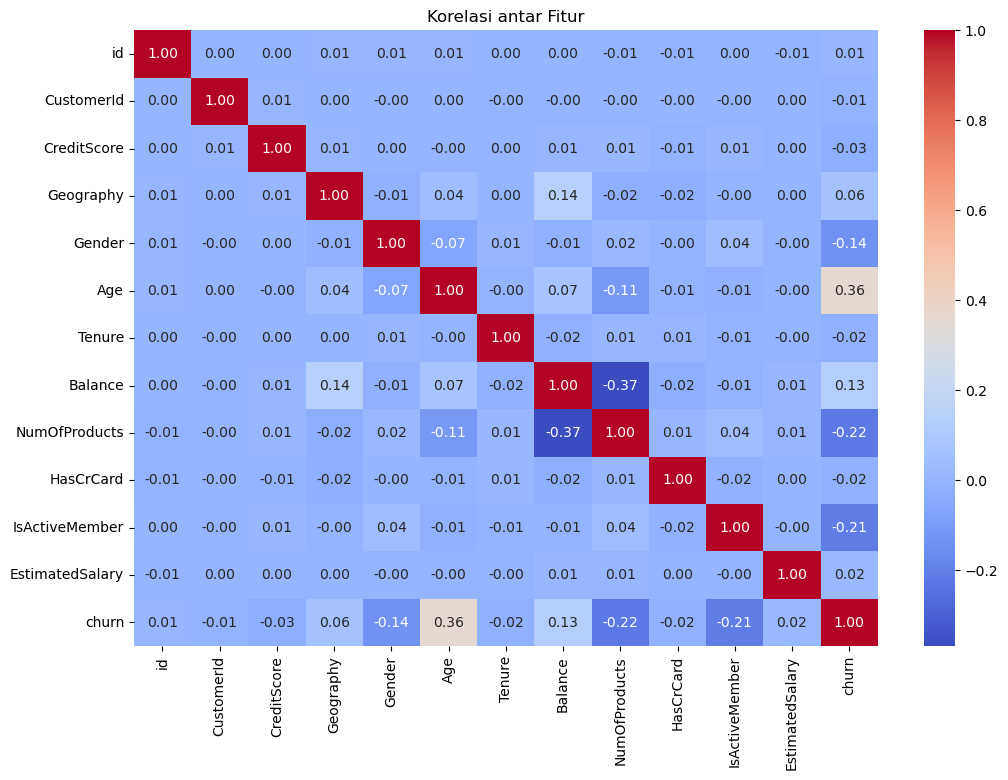

In [114]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi antar Fitur")
plt.show()

Churn memiliki korelasi signifikan dengan Age, NumOfProducts, dan IsActiveMember

Splitting Data

In [115]:
# Memilih fitur yang memiliki korelasi signifikan dengan target 'churn'
selected_features = ['Age', 'NumOfProducts', 'IsActiveMember']

# Memisahkan fitur dan target
x = df[selected_features]
y = df['churn']

# Cek dimensi dari fitur dan target
print("Dimensi fitur:", x.shape)
print("Dimensi target:", y.shape)

Dimensi fitur: (41259, 3)
Dimensi target: (41259,)


In [116]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

## Machine Learning Model

Random Forest

In [117]:
import warnings
warnings.filterwarnings('ignore')

RF_class = RandomForestClassifier(criterion= 'gini',max_depth=4)
RF_class.fit(x_train, y_train)


RandomForestClassifier(max_depth=4)

In [118]:
rf_pred=RF_class.predict(x_test)

In [119]:
from sklearn.metrics import classification_report

print(classification_report(y_test, rf_pred, target_names=['1','2']))

              precision    recall  f1-score   support

           1       0.85      0.97      0.91      6513
           2       0.79      0.38      0.51      1739

    accuracy                           0.85      8252
   macro avg       0.82      0.68      0.71      8252
weighted avg       0.84      0.85      0.83      8252



In [120]:
print("Random Forest Accuracy:", RF_class.score(x_test, y_test))

Random Forest Accuracy: 0.8477944740668929


Tuning Parameter using GridSearchCV

In [121]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[2,4,6,8], 
}

In [122]:
RF_class2 = RandomForestClassifier()
RF_class2= GridSearchCV(RF_class2 ,
                            param_grid = parameters,   # hyperparameters
                            scoring='accuracy',        # metric for scoring
                            cv=5)  

In [123]:
RF_class2.fit(x_train,y_train)
print("Tuned Hyperparameters :", RF_class2.best_params_)
print("Accuracy :",RF_class2.best_score_)

Tuned Hyperparameters : {'criterion': 'entropy', 'max_depth': 8}
Accuracy : 0.849334840943059


In [124]:
#Train the data using based parameter
RF_class_best = RandomForestClassifier(criterion= 'gini',max_depth=8)

In [125]:
RF_class_best.fit(x_train,y_train)

RandomForestClassifier(max_depth=8)

In [126]:
RF_predict_best=RF_class_best.predict(x_test)

In [127]:
print('\nClassification Report Random Forest Best\n')
print(classification_report(y_test, RF_predict_best, target_names=['1','2']))


Classification Report Random Forest Best

              precision    recall  f1-score   support

           1       0.87      0.95      0.91      6513
           2       0.72      0.46      0.56      1739

    accuracy                           0.85      8252
   macro avg       0.79      0.71      0.73      8252
weighted avg       0.84      0.85      0.83      8252



XGBoost

In [128]:
XGB_class = XGBClassifier(random_state=42)
XGB_class.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [129]:
XGB_pred = XGB_class.predict(x_test)

In [130]:
print('\nClassification Report XGBoost\n')
print(classification_report(y_test, XGB_pred, target_names=['1','2']))


Classification Report XGBoost

              precision    recall  f1-score   support

           1       0.87      0.96      0.91      6513
           2       0.73      0.44      0.55      1739

    accuracy                           0.85      8252
   macro avg       0.80      0.70      0.73      8252
weighted avg       0.84      0.85      0.83      8252



In [131]:
print("Random Forest Accuracy:", RF_class.score(x_test, y_test))
print("XGBoost Accuracy:", XGB_class.score(x_test, y_test))

Random Forest Accuracy: 0.8477944740668929
XGBoost Accuracy: 0.8486427532719341


Memilih model terbaik

In [132]:
#Memilih model terbaik 
best_model = RF_class_best
if XGB_class.score(x_test, y_test) > RF_class_best.score(x_test, y_test):
    best_model = XGB_class


In [133]:
#Menyimpan model terbaik dalam format pickle
import pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)

In [135]:
print("Best Model: ", best_model)

Best Model:  XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)
